# PRCP-1015-EquakeDamagePred

Create a predictive model in such a way that the objective is to predict the ordinal variable “damage_grade”. This column presents the level of damage grade affected by the earthquake.

## Importing the Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading The Dataset

In [5]:
train_labels = pd.read_csv('PRCP-1015-EquakeDamagePred\Data\train_labels.csv')
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [6]:
train_values = pd.read_csv('PRCP-1015-EquakeDamagePred\Data\train_values.csv')
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df = train_values.merge(train_labels, how='outer')
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,4,30,266,1224,1,25,5,2,t,r,...,0,0,0,0,0,0,0,0,0,2
1,8,17,409,12182,2,0,13,7,t,r,...,0,0,0,0,0,0,0,0,0,3
2,12,17,716,7056,2,5,12,6,o,r,...,0,0,0,0,0,0,0,0,0,3
3,16,4,651,105,2,80,5,4,n,r,...,0,0,0,0,0,0,0,0,0,2
4,17,3,1387,3909,5,40,5,10,t,r,...,0,0,0,0,0,0,0,0,0,2


## Analysis of Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

**Checking for Null values**

In [11]:
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

**We have no null values inside of the dataset**

**Checking for duplicates**

In [14]:
df.duplicated().sum()

0

**Summary Statistics**

In [16]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


## Exploratory Data Analysis EDA

<Axes: xlabel='damage_grade', ylabel='count'>

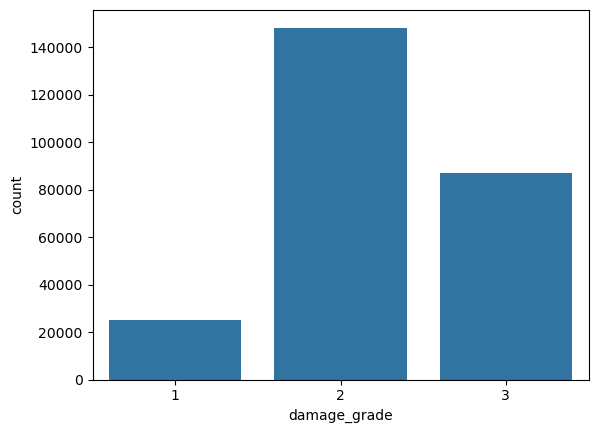

In [18]:
sns.countplot(x = 'damage_grade',data = df)

**There are 3 grades of the damage:
1 represents low damage
2 represents a medium amount of damage
3 represents almost complete destruction**

## Numerical Features and Damage Grade

**Geo Level and Damage Grade**

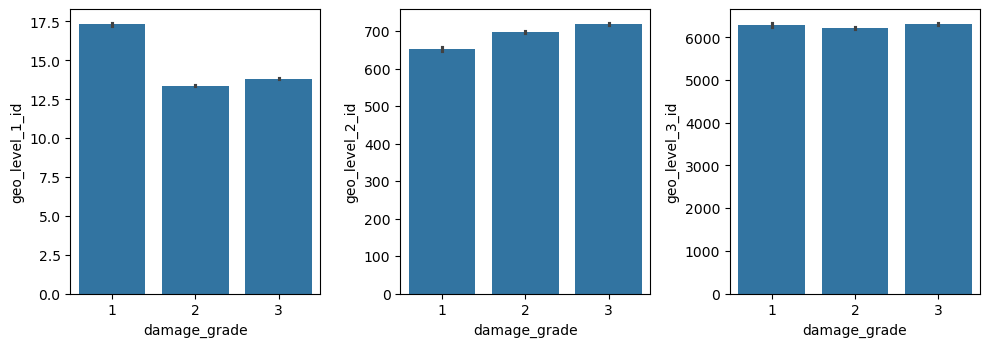

In [22]:
numerical = ['geo_level_1_id','geo_level_2_id','geo_level_3_id']
plt.figure(figsize=(10,10))
plotnumber = 1
for i in numerical:
    plt.subplot(3,3,plotnumber)
    sns.barplot(x = df['damage_grade'],y = df[i])
    plotnumber += 1
plt.tight_layout()

### Insights
- At geographic level 1 has the lowest damage i.e 75% of buildings that experienced low levels of damage.
- At geographic level 2 has the highest damage i.e 75% of buildings that experienced highest levels of damage.
- At geographic level 3 has the same the same level of damage i.e. all the buildings have experienced the same level of damage.


**Number of Floor and Damage Grade**

<Axes: xlabel='count_floors_pre_eq', ylabel='count'>

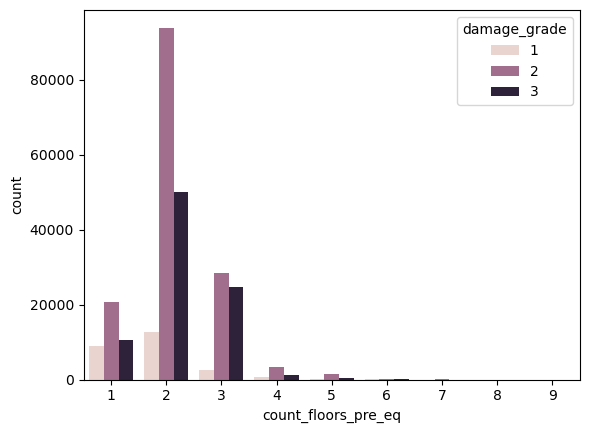

In [25]:
sns.countplot(x = 'count_floors_pre_eq',hue = 'damage_grade',data = df)

### Insights
- There are 3 types of buildings based on the number of floors, namely 2-story buildings, followed by 3-story buildings and 1-story buildings.
- It was observed that buildings with 2 floors experienced a medium level of damage, followed by high levels of damage and low levels of damage.
- This also applies to buildings with 3 floors and 1 floor.

**Age and Damage Grade**

<Axes: xlabel='age', ylabel='count'>

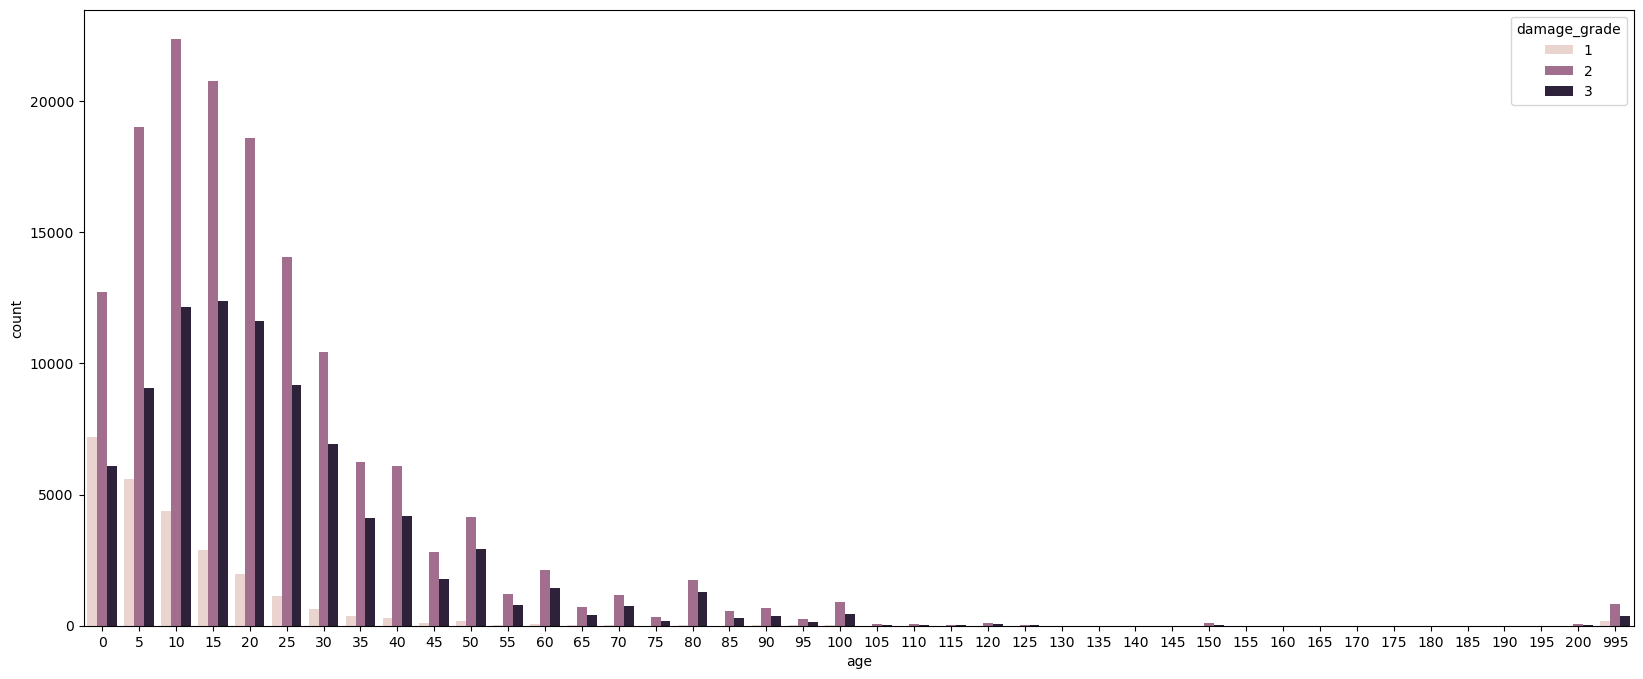

In [28]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'age',hue = 'damage_grade',data = df)

### Insights

-In this image, it can be seen that the distribution of building age is in the range of 0-200 years then continued with building age of more than 950 years. The buildings has faced with a medium amount of damage.

**Area Percentage and Damage Grade**

<Axes: xlabel='area_percentage', ylabel='count'>

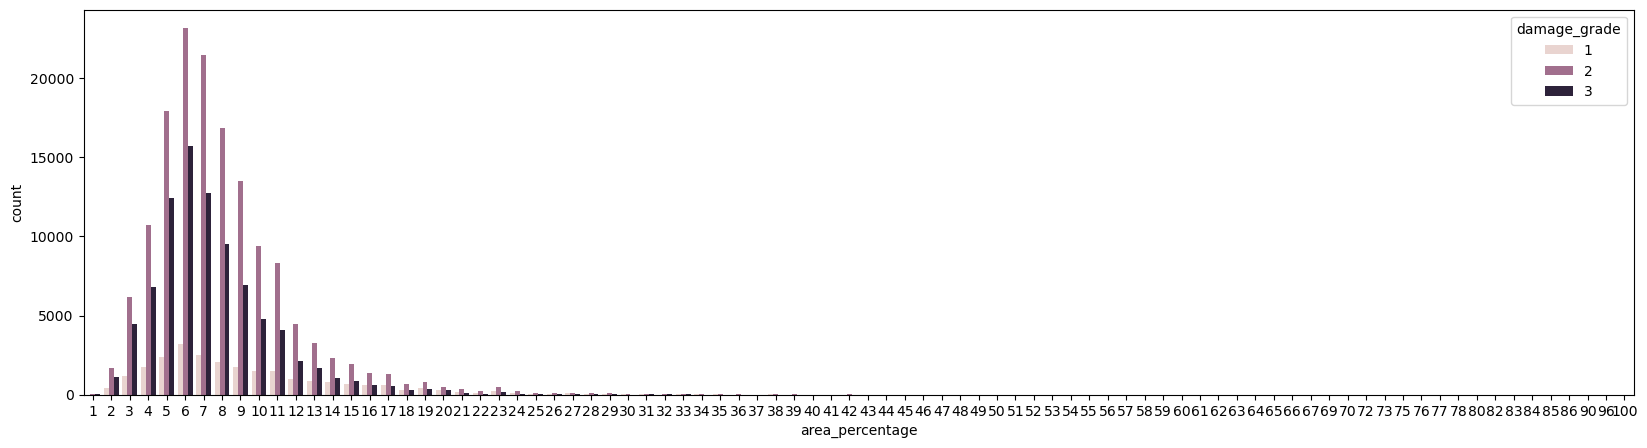

In [31]:
fig = plt.figure(figsize=(20,5))
sns.countplot(x = 'area_percentage',hue = 'damage_grade',data = df)

### Insights

- It is seen that many buildings having an area percentage of 1 to 20 and the majority experienced moderate damage due to the earthquake.

**Height Percentage and Damage Grade**

<Axes: xlabel='height_percentage', ylabel='count'>

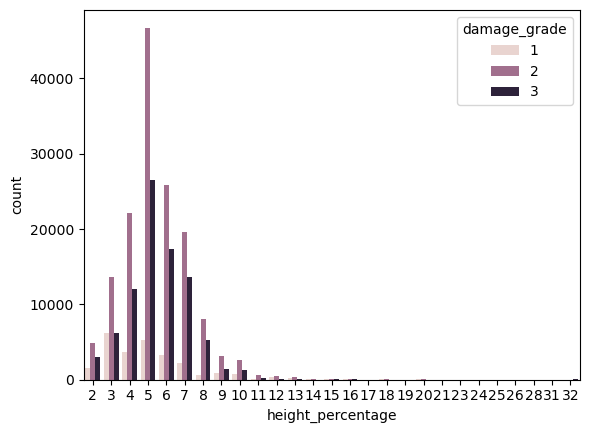

In [34]:
sns.countplot(x = 'height_percentage',hue = 'damage_grade',data = df)

### Insights

- The height of the building itself is in the range of 2 to 10 and experienced moderate damage due to the earthquake.

**Count Families and Damage Grade**

<Axes: xlabel='count_families', ylabel='count'>

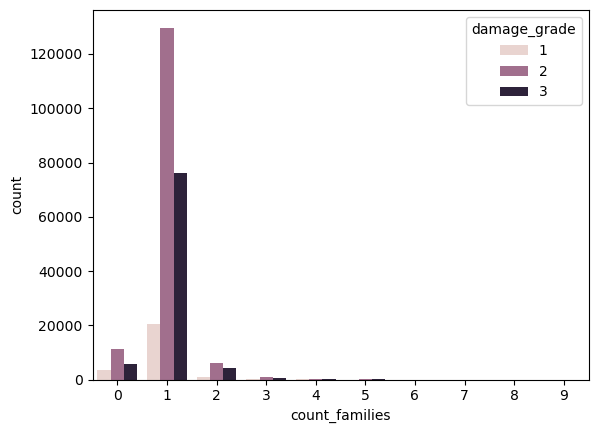

In [37]:
sns.countplot(x = 'count_families',hue = 'damage_grade',data = df)

### Insights

- The majority of buildings in Nepal affected by the earthquake were inhabited by 0-2 people.

## Categorical Column and Damage Grade

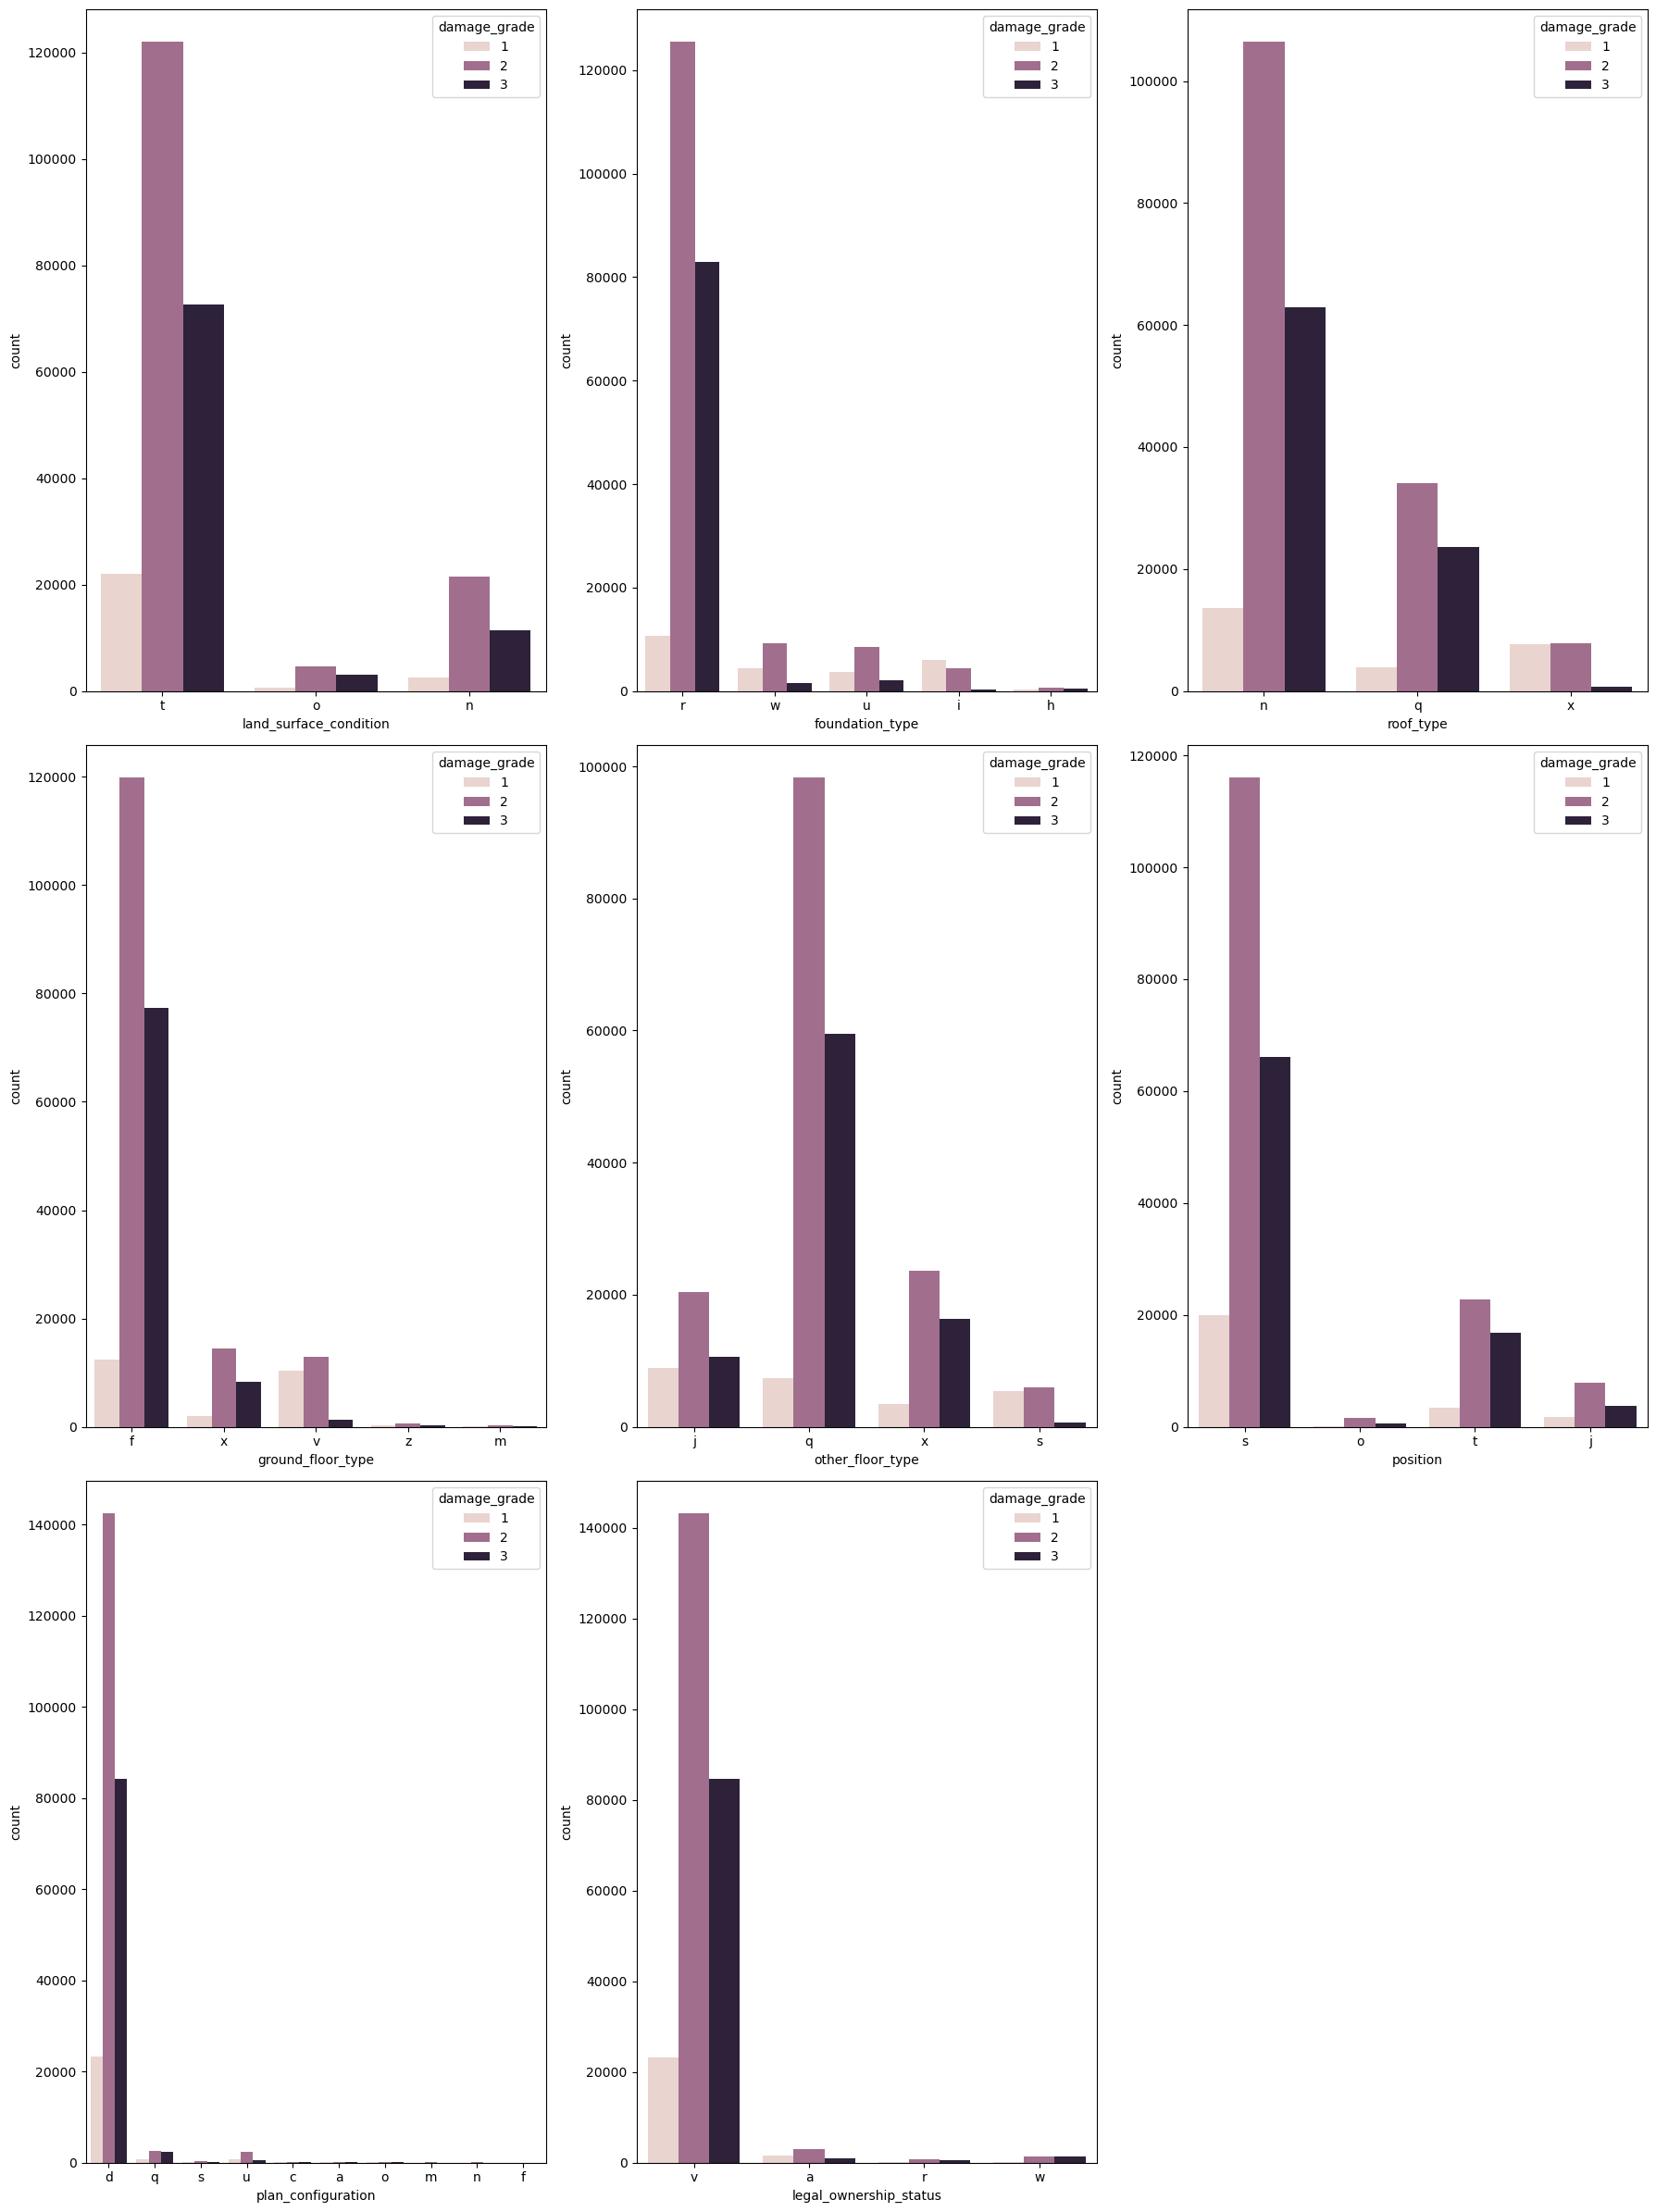

In [40]:
categorical = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
fig = plt.figure(figsize=(18,24))
plotnumber = 1
for i in categorical:
    plt.subplot(3,3,plotnumber)
    sns.countplot(x = i,hue = 'damage_grade',data = df)
    plotnumber += 1
plt.tight_layout()

### Insights

- Based on the image above,building surface condition of t and this surface has an influence on the level of damage that occurs to the building.
- Buildings with foundation type r have the largest number and have an influence on the level of damage that occurs to the building.
- Buildings with roof type n have the largest number and have an influence on the level of damage that occurs to the building.
- Buildings with floor types used on the ground floor of the building type f have the largest number and have an influence on the level of damage that  occurs to the building.
-  Buildings with floor types used on other floors mostly use type q floors and the majority of them experience medium and high levels of damage.
-  Buildings with type s positions and the majority experience medium levels of damage due to the earthquake.
-  The plan configuration of buildings d had the medium levels of damage.
-  The building ownership status is dominated by v and many of them experience medium levels of damage.

## Binary Column and Damage Grade

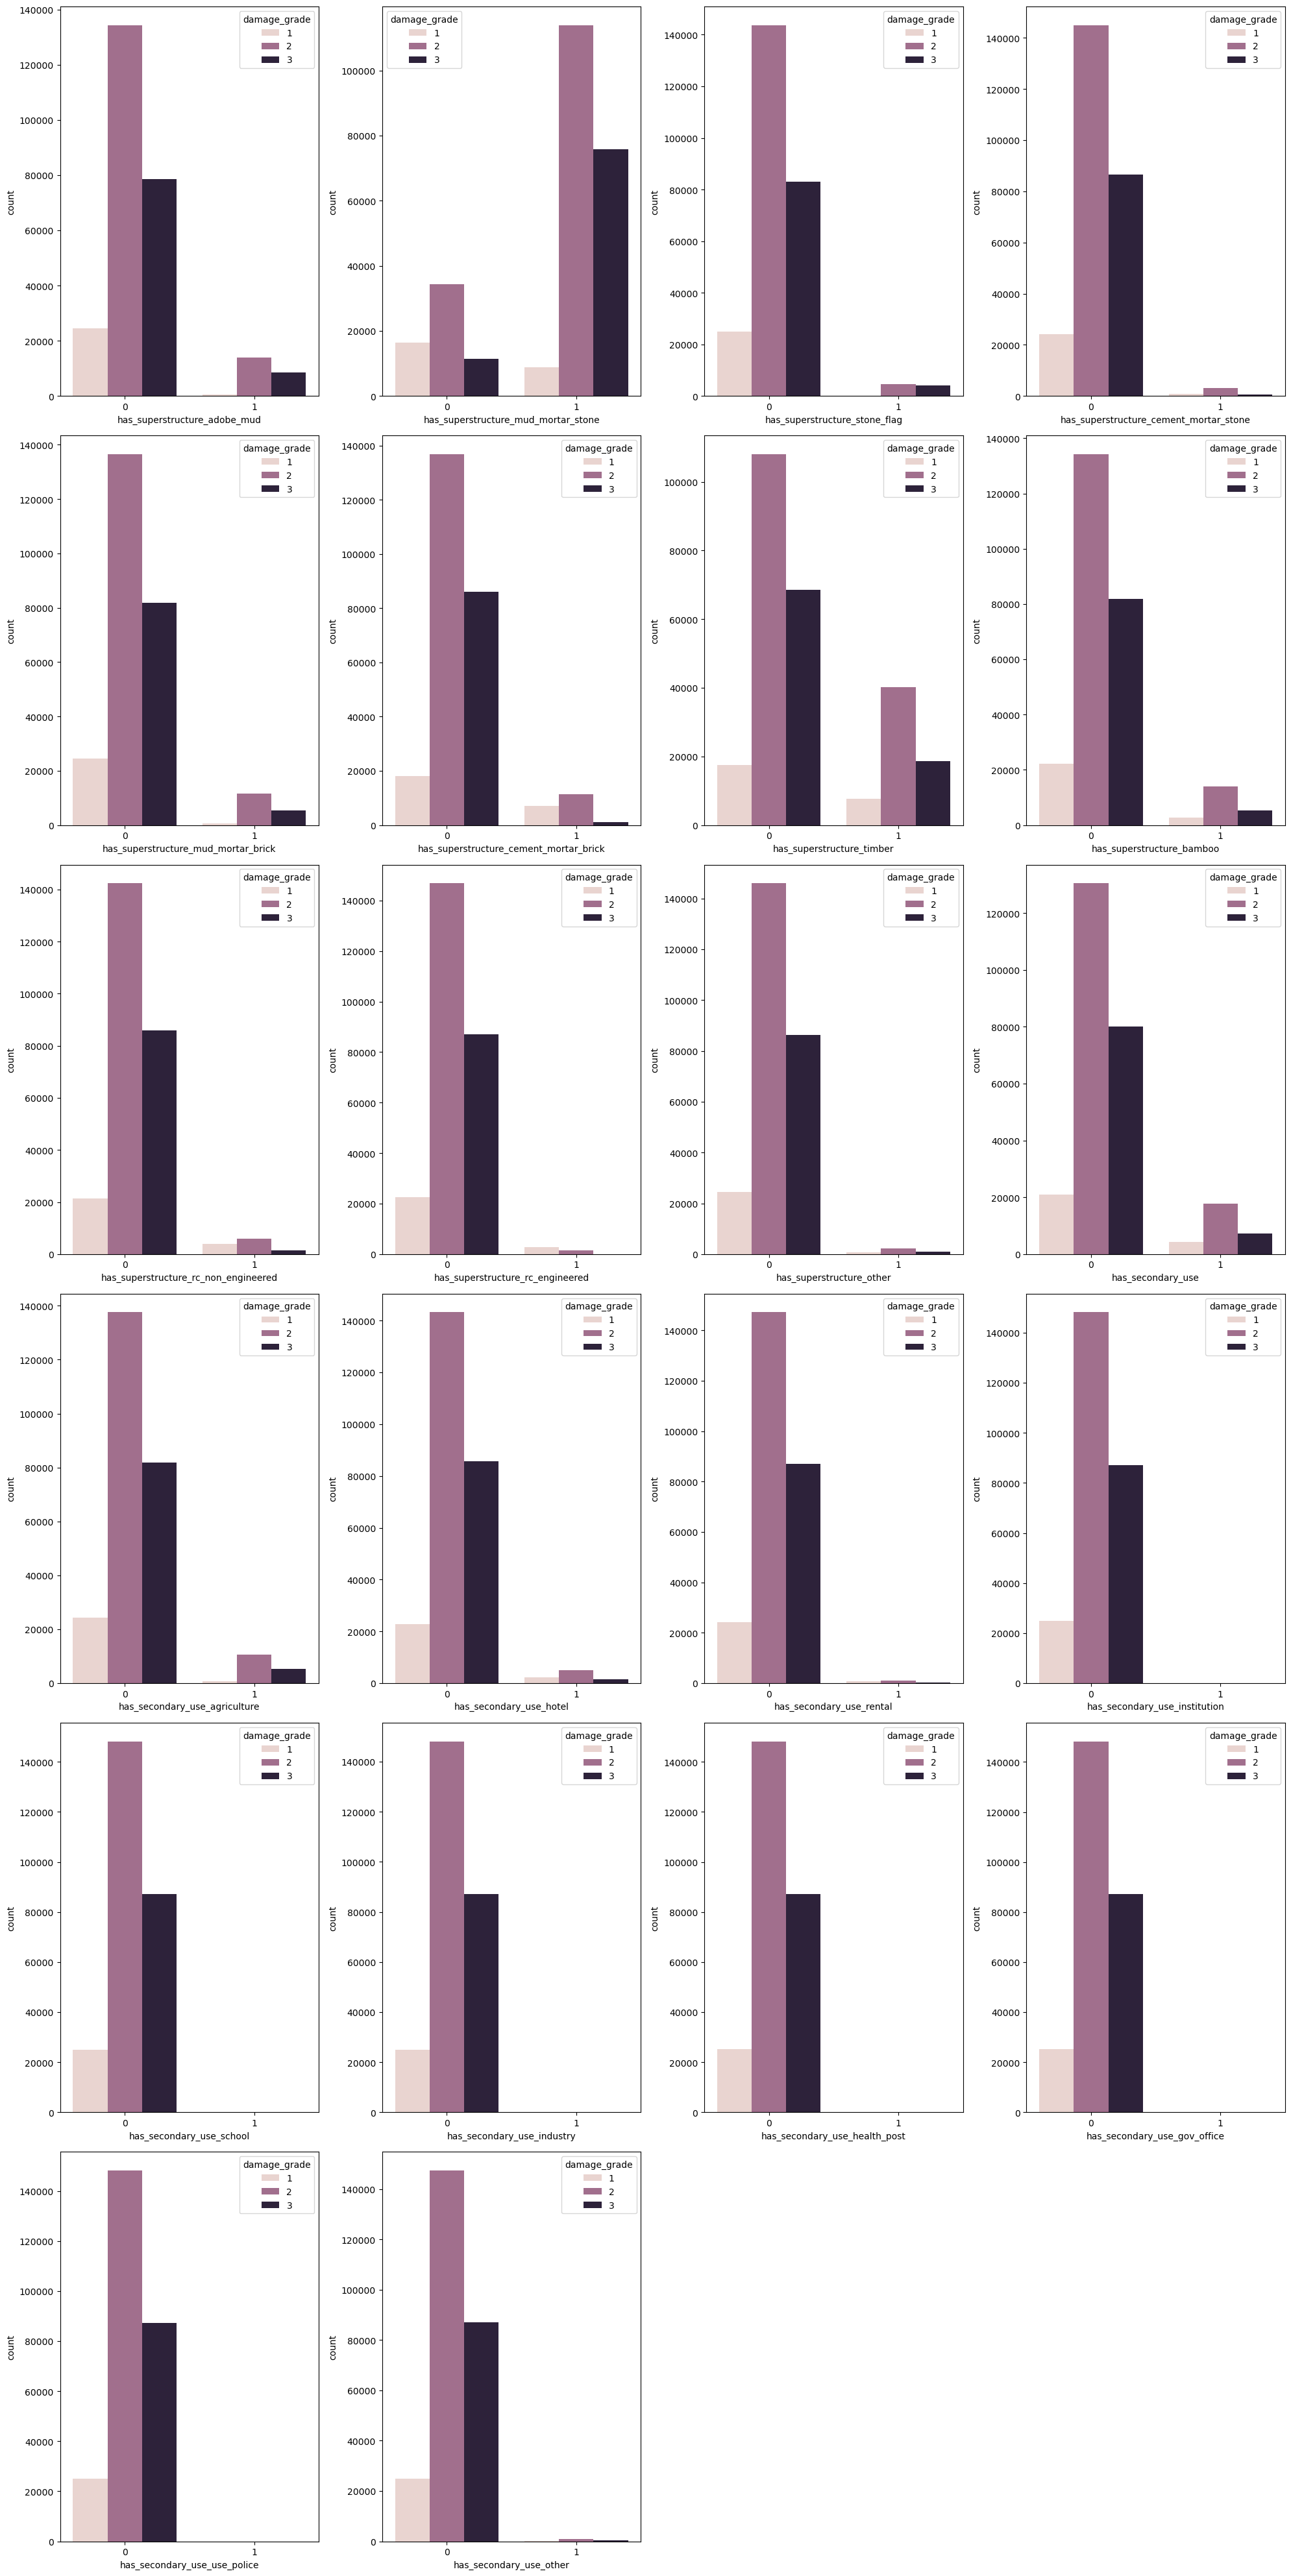

In [43]:
Binary = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone','has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
          'has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick','has_superstructure_timber', 'has_superstructure_bamboo',
          'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered','has_superstructure_other',
          'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel','has_secondary_use_rental', 
          'has_secondary_use_institution','has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 
          'has_secondary_use_gov_office','has_secondary_use_use_police', 'has_secondary_use_other']
fig = plt.figure(figsize=(20,46))
plotnumber = 1
for i in Binary:
    plt.subplot(7,4,plotnumber)
    sns.countplot(x = i,hue = 'damage_grade',data = df)
    plotnumber += 1
plt.tight_layout()

### Insights

- In buildings the superstructure that is widely used in buildings is a mixed superstructure between Mud, Mortar Stone or Timber superstructure.
- In buildings that use this superstructure, most of them experience moderate levels of damage followed by high levels of damage.
-  In addition to buildings used for agriculture, hotels, rentals, institutions, schools, health posts, government offices, police stations, and other purposes.
-  Most buildings has experience moderate levels of damage.

**Converting Categorical Data to Numberical Data**

In [46]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for column in df.columns:
    df[column] = LE.fit_transform(df[column])

**Correlation Matrix**

<Axes: >

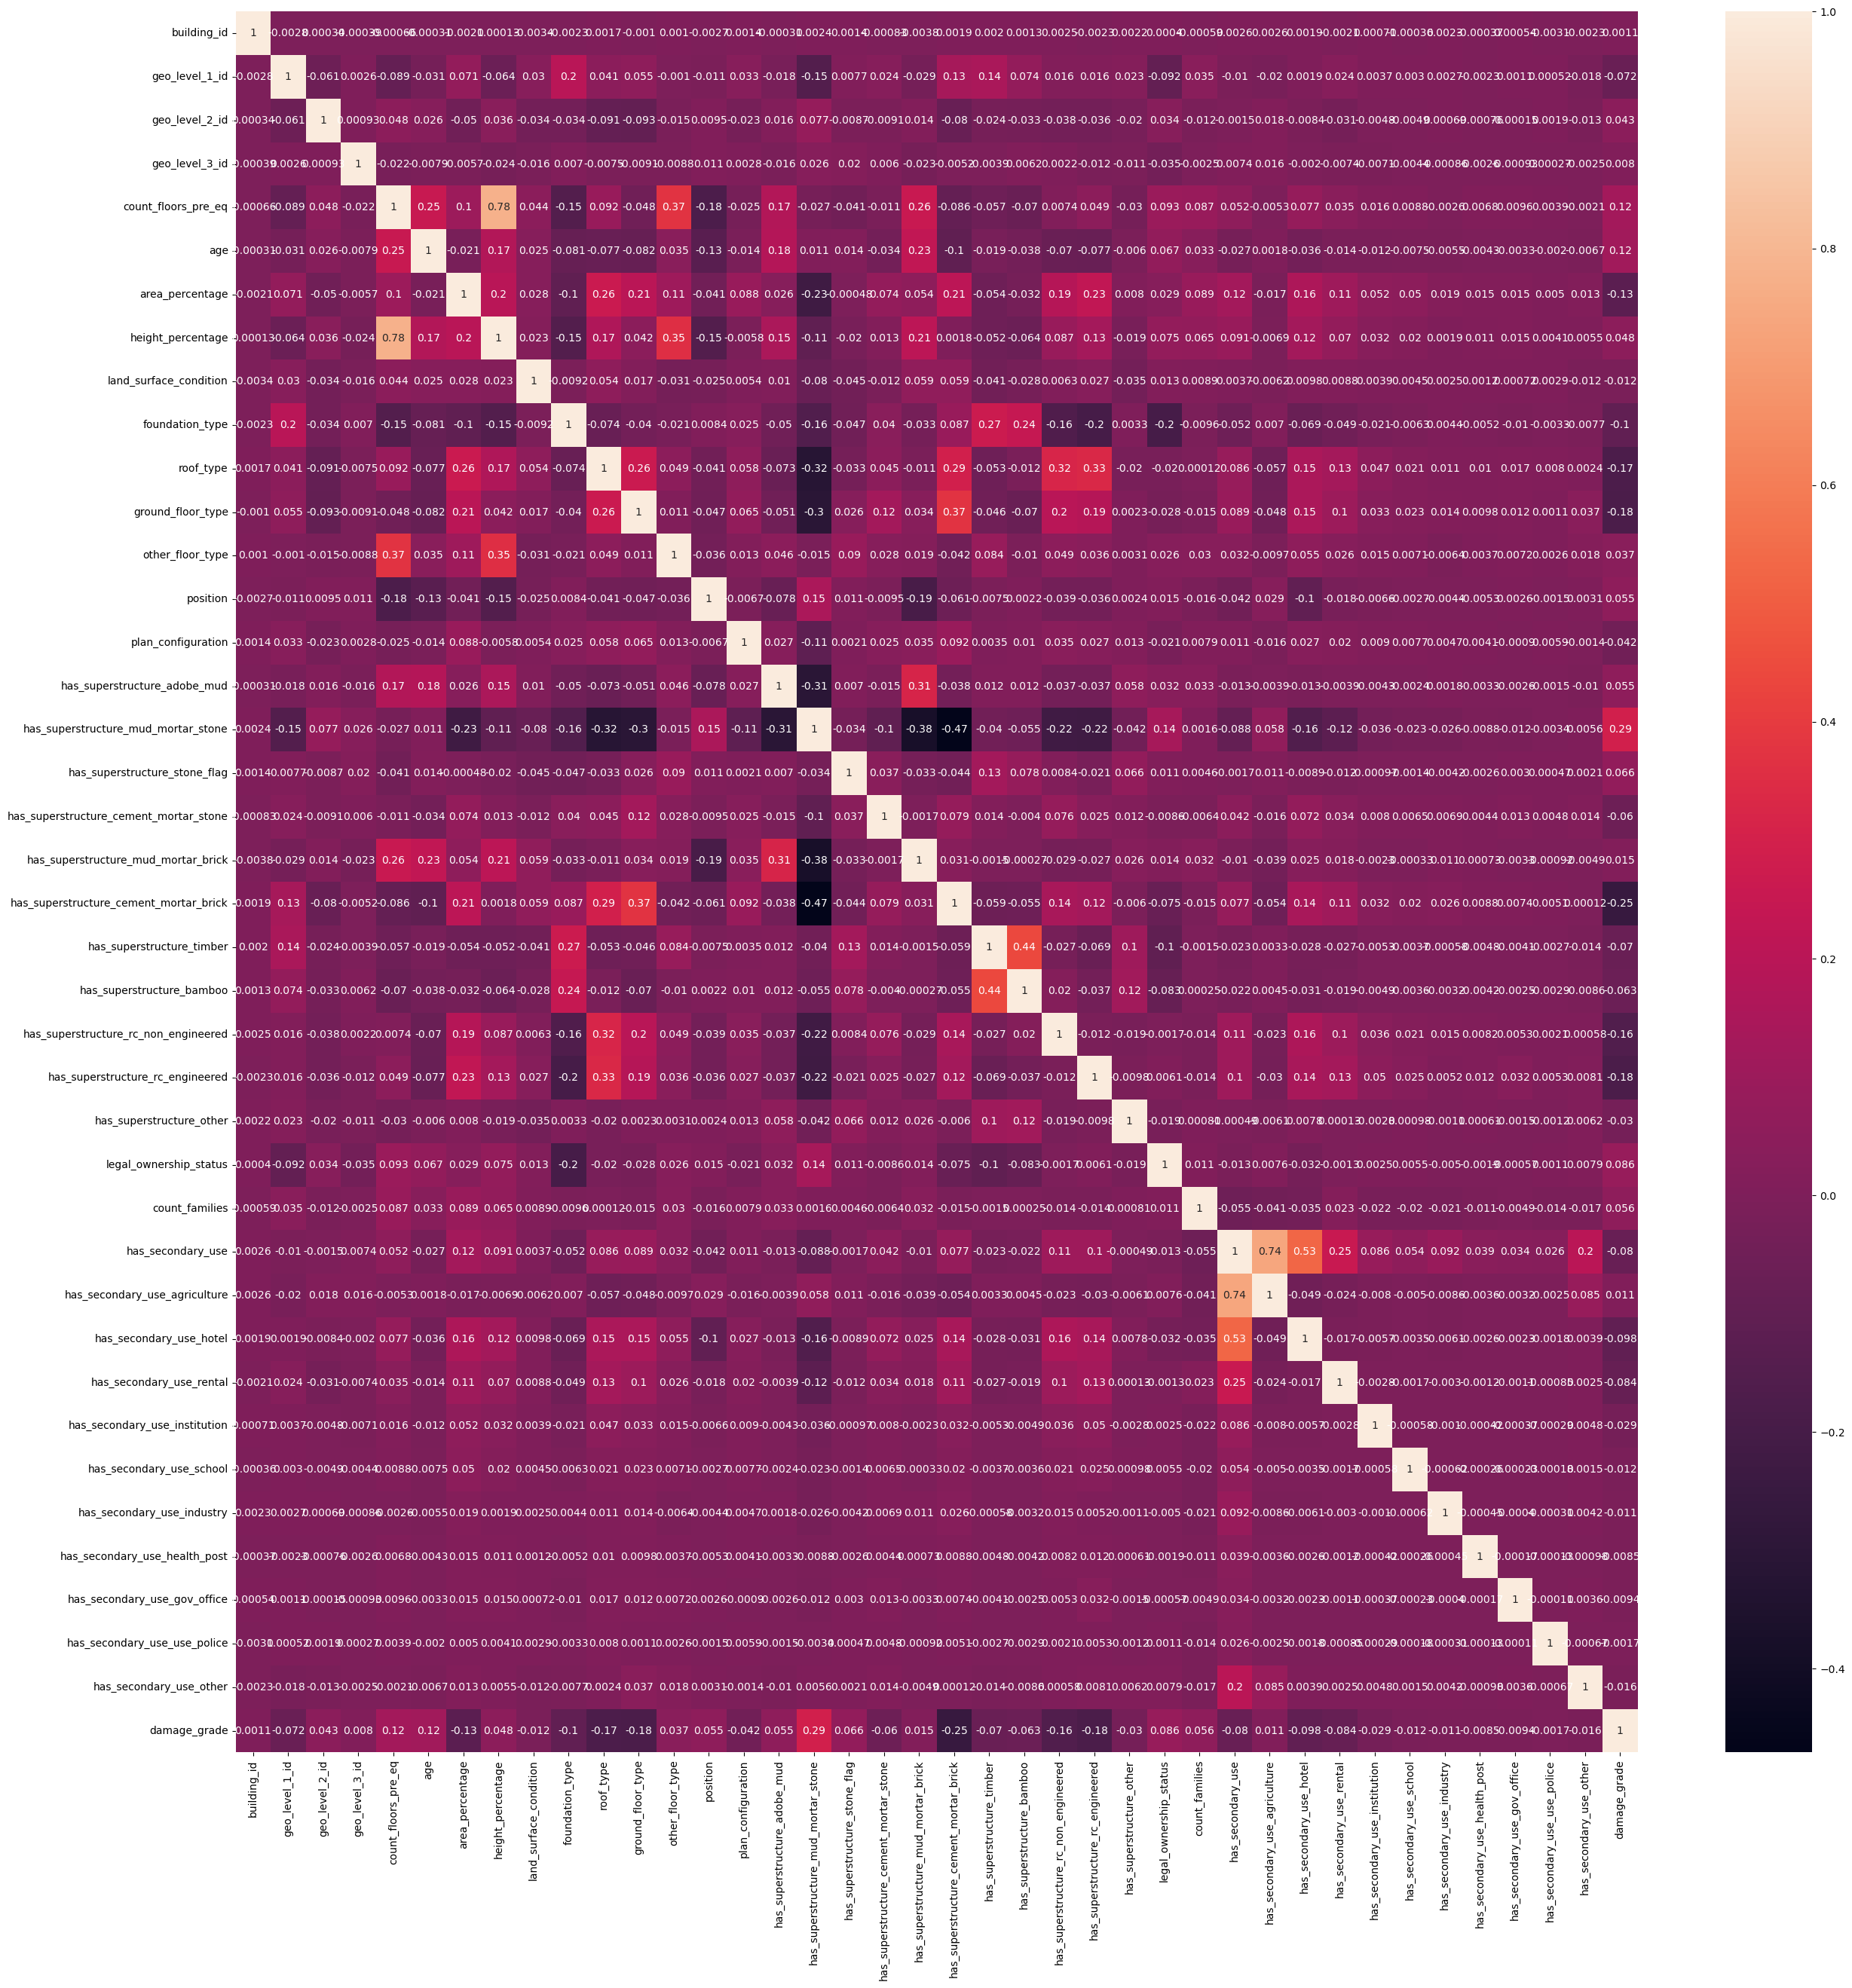

In [47]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot = True)

**The correlation by numbers shows that the area, the number of floors and some superstructure features are correlated with the target.**

## Modeling

In [50]:
final_res =[]

In [51]:
X= df.drop('damage_grade',axis =1)
y = df.damage_grade

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.02,random_state = 42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(255388, 39) (5213, 39) (255388,) (5213,)


In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Logistic Regression**

In [55]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [56]:
y_pred_LR = LR.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [58]:
print('Logistic Regression :')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_LR))
print('F1 Score :',f1_score(y_test, y_pred_LR, average='micro'))
print(classification_report(y_test, y_pred_LR))
acc_LR = accuracy_score(y_test, y_pred_LR)
final_res.append(acc_LR)

Logistic Regression :
Accuracy Score:  0.5896796470362555
F1 Score : 0.5896796470362555
              precision    recall  f1-score   support

           0       0.57      0.29      0.39       466
           1       0.60      0.89      0.72      3036
           2       0.49      0.13      0.20      1711

    accuracy                           0.59      5213
   macro avg       0.55      0.44      0.44      5213
weighted avg       0.56      0.59      0.52      5213



**Decision Tree**

In [60]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
y_pred_DTC = DTC.predict(X_test)

In [62]:
print('Decision Tree :')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_DTC))
print('F1 Score :',f1_score(y_test, y_pred_DTC, average='micro'))
print(classification_report(y_test, y_pred_DTC))
acc_DTC = accuracy_score(y_test, y_pred_DTC)
final_res.append(acc_DTC)

Decision Tree :
Accuracy Score:  0.6549012085171686
F1 Score : 0.6549012085171686
              precision    recall  f1-score   support

           0       0.46      0.50      0.48       466
           1       0.73      0.69      0.71      3036
           2       0.59      0.63      0.61      1711

    accuracy                           0.65      5213
   macro avg       0.59      0.61      0.60      5213
weighted avg       0.66      0.65      0.66      5213



**Random Forest**

In [64]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
y_pred_RFC = RFC.predict(X_test)

In [66]:
print('Random Forest :')
print('Accuracy Score :',accuracy_score(y_test,y_pred_RFC))
print('F1 Score :',f1_score(y_test, y_pred_RFC, average='micro'))
print(classification_report(y_test, y_pred_RFC))
acc_RFC = accuracy_score(y_test,y_pred_RFC)
final_res.append(acc_RFC)

Random Forest :
Accuracy Score : 0.7325915979282562
F1 Score : 0.7325915979282562
              precision    recall  f1-score   support

           0       0.63      0.47      0.54       466
           1       0.74      0.83      0.78      3036
           2       0.73      0.63      0.68      1711

    accuracy                           0.73      5213
   macro avg       0.70      0.64      0.67      5213
weighted avg       0.73      0.73      0.73      5213



**K-Nearest Neighbors**

In [68]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [69]:
y_pred_KNN = KNN.predict(X_test)

In [70]:
print('K-Nearest Neighbors : ')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_KNN))
print('F1 Score :',f1_score(y_test, y_pred_KNN, average='micro'))
print(classification_report(y_test, y_pred_KNN))
acc_KNN = accuracy_score(y_test, y_pred_KNN)
final_res.append(acc_KNN)

K-Nearest Neighbors : 
Accuracy Score:  0.645501630539037
F1 Score : 0.645501630539037
              precision    recall  f1-score   support

           0       0.50      0.49      0.50       466
           1       0.69      0.73      0.71      3036
           2       0.59      0.54      0.56      1711

    accuracy                           0.65      5213
   macro avg       0.59      0.59      0.59      5213
weighted avg       0.64      0.65      0.64      5213



**XGBoost**

In [72]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [73]:
y_pred_XGB = XGB.predict(X_test)

In [74]:
print('XGBoost : ')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_XGB))
print('F1 Score :',f1_score(y_test, y_pred_XGB, average='micro'))
print(classification_report(y_test, y_pred_XGB))
acc_XGB = accuracy_score(y_test, y_pred_XGB)
final_res.append(acc_XGB)

XGBoost : 
Accuracy Score:  0.7400728946863611
F1 Score : 0.7400728946863611
              precision    recall  f1-score   support

           0       0.67      0.47      0.55       466
           1       0.74      0.85      0.79      3036
           2       0.75      0.62      0.68      1711

    accuracy                           0.74      5213
   macro avg       0.72      0.65      0.67      5213
weighted avg       0.74      0.74      0.73      5213



**GradientBoosting**

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [77]:
y_pred_GBC = GBC.predict(X_test)

In [78]:
print('GradientBoosting : ')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_GBC))
print('F1 Score :',f1_score(y_test, y_pred_GBC, average='micro'))
print(classification_report(y_test, y_pred_GBC))
acc_GBC = accuracy_score(y_test, y_pred_GBC)
final_res.append(acc_GBC)

GradientBoosting : 
Accuracy Score:  0.6919240360636869
F1 Score : 0.6919240360636869
              precision    recall  f1-score   support

           0       0.60      0.37      0.46       466
           1       0.69      0.85      0.76      3036
           2       0.71      0.49      0.58      1711

    accuracy                           0.69      5213
   macro avg       0.67      0.57      0.60      5213
weighted avg       0.69      0.69      0.68      5213



**AdaBoosting**

In [80]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
ADA.fit(X_train,y_train)

AdaBoostClassifier()

In [81]:
y_pred_ADA = ADA.predict(X_test)

In [82]:
print('AdaBoosting : ')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_ADA))
print('F1 Score :',f1_score(y_test, y_pred_ADA, average='micro'))
print(classification_report(y_test, y_pred_ADA))
acc_ADA = accuracy_score(y_test, y_pred_ADA)
final_res.append(acc_ADA)

AdaBoosting : 
Accuracy Score:  0.6456934586610397
F1 Score : 0.6456934586610397
              precision    recall  f1-score   support

           0       0.56      0.32      0.40       466
           1       0.65      0.85      0.74      3036
           2       0.65      0.37      0.47      1711

    accuracy                           0.65      5213
   macro avg       0.62      0.51      0.54      5213
weighted avg       0.64      0.65      0.62      5213



In [83]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,4),
                      learning_rate_init = 0.1,
                      max_iter = 100,random_state = 2)
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 4), learning_rate_init=0.1, max_iter=100,
              random_state=2)

In [84]:
y_pred_ANN = model.predict(X_test)

In [85]:
print('Artificial Neural Networks : ')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_ANN))
print('F1 Score :',f1_score(y_test, y_pred_ANN, average='micro'))
print(classification_report(y_test, y_pred_ANN))
acc_ANN = accuracy_score(y_test, y_pred_ANN)
final_res.append(acc_ANN)

Artificial Neural Networks : 
Accuracy Score:  0.5823901784001535
F1 Score : 0.5823901784001535
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       466
           1       0.58      1.00      0.74      3036
           2       0.00      0.00      0.00      1711

    accuracy                           0.58      5213
   macro avg       0.19      0.33      0.25      5213
weighted avg       0.34      0.58      0.43      5213



## Comparing Algorithm

Text(0.5, 1.0, 'Accuracy Score')

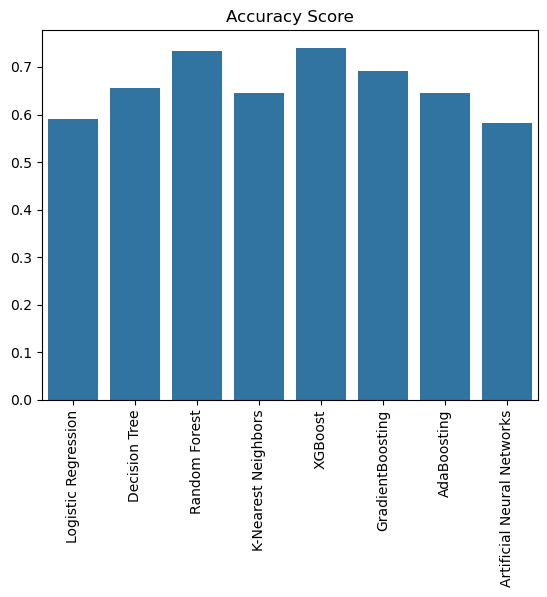

In [87]:
plt.xticks(rotation = 90)
sns.barplot(x = ['Logistic Regression','Decision Tree', 'Random Forest','K-Nearest Neighbors','XGBoost','GradientBoosting','AdaBoosting','Artificial Neural Networks'], y = [accuracy_score(y_test, y_pred_LR), accuracy_score(y_test, y_pred_DTC), accuracy_score(y_test, y_pred_RFC), accuracy_score(y_test, y_pred_KNN), accuracy_score(y_test, y_pred_XGB), accuracy_score(y_test, y_pred_GBC),accuracy_score(y_test, y_pred_ADA),accuracy_score(y_test, y_pred_ANN)]).set_title('Accuracy Score')

In [88]:
final=np.array(final_res)
result=final.reshape(-1,1)
columns=['Accuracy']
index=['Logistic Regression','Decision Tree', 'Random Forest','K-Nearest Neighbors','XGBoost','GradientBoosting','AdaBoosting','Artificial Neural Networks']
final_result=pd.DataFrame(result,index=index,columns=columns)
final_result.sort_values(by='Accuracy', ascending=False)

,Accuracy
XGBoost,0.740073
Random Forest,0.732592
GradientBoosting,0.691924
Decision Tree,0.654901
AdaBoosting,0.645693
K-Nearest Neighbors,0.645502
Logistic Regression,0.589680
Artificial Neural Networks,0.582390


## Conclusion
The process of predicting the level of damage caused by earthquake to buildings can be predicted using the Machine Learning algorithm.
The model with the highest Accuracy Score in predicting the level of damage caused by the earthquake to buildings is the XGBoost algorithm model using the XGBClassifier.
Using this model, the Accuracy Score value is 74.00%. 